In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df= pd.read_csv ("c:/MachineLearning/ContactLens.csv")

In [3]:
df.head(38)

,Survery,Age,ZipCode,Gender,CurrentType,CurrentAcuity,InitialAcuity,AgeFirstRx,Age18Acuity,Age30Acuity,TypeAt30,Changed to glasses contact both Lasik,Age when switched,Did not switch,Switch improve vision?,Regret Switching?,note
0,1,48,95757,F,0,0,150,5,700,700,2,2,14.0,NaN,1.0,No,"contact, lasik"
1,2,48,95829,M,1,425,125,9,325,350,1,0,NaN,x,NaN,NaN,NaN
2,3,47,95831,F,1,600,300,14,350,450,1,1,24.0,NaN,0.0,No,NaN
3,4,76,95829,M,1,550,200,14,300,350,1,0,NaN,x,NaN,NaN,NaN
4,5,47,94502,F,1,600,70,10,400,550,3,3,17.0,NaN,2.0,No,NaN
5,6,47,37087,F,1,40,225,42,160,160,1,0,NaN,x,NaN,NaN,NaN
6,7,36,TN,F,1,450,450,1,50,50,1,0,NaN,x,NaN,NaN,NaN
7,8,32,37090,M,1,300,200,16,250,300,1,0,NaN,x,NaN,NaN,NaN
8,9,45,37122,M,1,40,40,19,30,40,1,0,NaN,x,NaN,NaN,NaN
9,10,49,37027,F,1,40,40,39,20,20,1,0,NaN,NaN,NaN,NaN,NaN


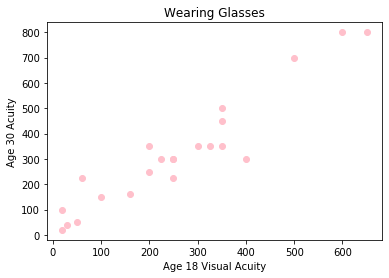

In [4]:
##Predict users at age30 who wear glasses
Contact = df.loc[df['TypeAt30'] == 1]

plt.scatter(Contact.Age18Acuity, Contact.Age30Acuity,  color='pink')
plt.xlabel("Age 18 Visual Acuity")
plt.ylabel("Age 30 Acuity")
plt.title("Wearing Glasses")
plt.show()

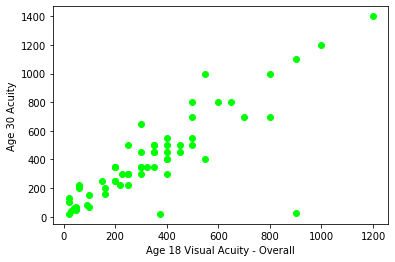

In [5]:
plt.scatter(df.Age18Acuity, df.Age30Acuity,  color='lime')
plt.xlabel("Age 18 Visual Acuity - Overall")
plt.ylabel("Age 30 Acuity")
plt.show()


In [6]:
# split data set into train and test sets. 80% for training. 20% for testing
# ~ invert all bits (not function)
msk = np.random.rand(len(df)) < 0.8
train = df[msk]  # assign train to random 80% of test data
test = df[~msk]  # assign all data not in msk

#import the model
from sklearn import linear_model

# Train regression model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Age18Acuity']])
train_y = np.asanyarray(train[['Age30Acuity']])
regr.fit (train_x, train_y)

# Print the coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[1.10439506]]
Intercept:  [44.38556442]


Text(0, 0.5, 'Age 30 Vision')

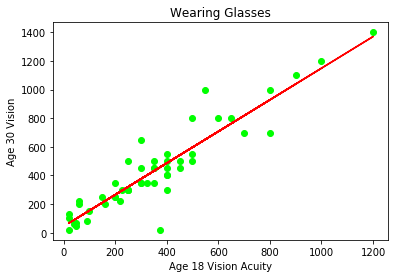

In [7]:
#print the fit line over the data

#print scatter graph of the data
plt.scatter(train.Age18Acuity, train.Age30Acuity,  color='lime') 

#print the fit line
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')

#data label
plt.xlabel("Age 18 Vision Acuity")
plt.title("Wearing Glasses")
plt.ylabel("Age 30 Vision")


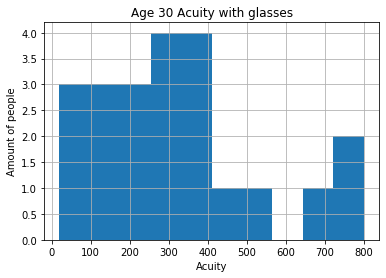

In [13]:
Glasses = df.loc[df['TypeAt30'] == 1]
viz = Glasses['Age30Acuity']
viz.hist()
plt.title('Age 30 Acuity with glasses')
plt.xlabel("Acuity")
plt.ylabel("Amount of people")
plt.show()

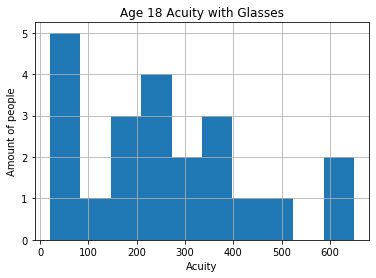

In [12]:
viz = Glasses['Age18Acuity']
viz.hist()
plt.title("Age 18 Acuity with Glasses")
plt.xlabel("Acuity")
plt.ylabel("Amount of people")
plt.show()

In [10]:
print("average age:")
df["AgeFirstRx"].mean()

average age:


16.322580645161292

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


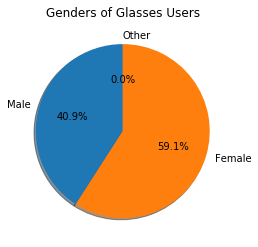

In [11]:
train = df.loc[df['TypeAt30'] == 1]

train['Gender'] = train['Gender'].map({'M': 1, 'F':0, 'O':2})



labels = 'Male', 'Female', 'Other'

sizes = [train.loc[train['Gender'] == 1].shape[0], train.loc[train['Gender'] == 0].shape[0], train.loc[train['Gender'] == 2].shape[0]] 
explode = (0, 0, 0)  




plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Genders of Glasses Users")
plt.show()